<a href="https://colab.research.google.com/github/sungjindo/python_study/blob/main/ch9_%EB%8F%84%EC%84%B1%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 이름: 도성진


outlier detection 연습 예제 이외의 부분도 이해의 편의성을을 위해해 남겨두었습니다. ???? 부분만 채워주시면 되고 다른 부분은 실행만 해도 무방합니다 :D

## Importing Libraries

In [ ]:
# ref https://www.kaggle.com/gizemaydn/learning-data-science-with-iris-and-its-outliers

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


## 1. Iris with outliers 파일을을 불러와와 각각 species별 min,max,std,mean을 확인해라.

Read Data

In [ ]:
data_iris = pd.read_csv('/content/gdrive/My Drive/data/Iris_with_outliers.csv')
print('Read')

Read


Overview, First Look

In [ ]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     173 non-null    int64  
 1   Id             173 non-null    int64  
 2   SepalLengthCm  170 non-null    float64
 3   SepalWidthCm   172 non-null    float64
 4   PetalLengthCm  169 non-null    float64
 5   PetalWidthCm   171 non-null    float64
 6   Species        173 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.6+ KB


Dropping unnecessary columns

In [ ]:
data_iris.drop(labels=data_iris.columns[0], axis=1, inplace=True)
print("dropped")

dropped


In [ ]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [ ]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             173 non-null    int64  
 1   SepalLengthCm  170 non-null    float64
 2   SepalWidthCm   172 non-null    float64
 3   PetalLengthCm  169 non-null    float64
 4   PetalWidthCm   171 non-null    float64
 5   Species        173 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [ ]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,173.000000,170.000000,172.000000,169.000000,171.000000
mean,86.000000,5.834118,3.068605,3.718935,1.171345
std,50.084928,0.844972,0.444922,1.778207,0.763774
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,43.000000,5.100000,2.800000,1.500000,0.300000
50%,86.000000,5.800000,3.000000,4.300000,1.300000
75%,129.000000,6.400000,3.400000,5.100000,1.800000
max,172.000000,8.000000,4.400000,6.900000,2.500000


In [ ]:
data_iris.groupby('Species').agg(['min','max','std','mean'])


Id                       ... PetalWidthCm                         
                 min  max        std mean  ...          min  max       std      mean
Species                                    ...                                      
Iris-setosa        0   60  17.752934   30  ...          0.1  2.1  0.293715  0.298333
Iris-versicolor   61  115  16.020820   88  ...          0.4  1.8  0.232871  1.314545
Iris-virginica   116  172  16.598193  144  ...          0.4  2.5  0.402843  1.966071

[3 rows x 20 columns]

Checking There is NaN values or not.

In [ ]:
data_iris.isnull().values.any()

True

In [ ]:
data_iris.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

If there was NaN values, I could assign the average values with the sample script below.

In [ ]:
for column in data_iris.columns[1:-1]:
    data_iris[column].fillna(value=data_iris[column].mean(), inplace=True)

## Visualizing Data

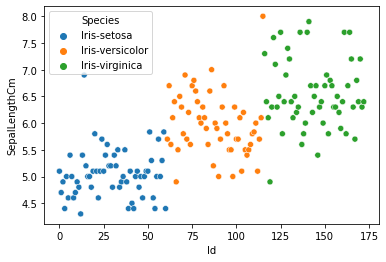

In [ ]:
sns.scatterplot(data=data_iris, x="Id",y="SepalLengthCm",hue="Species")

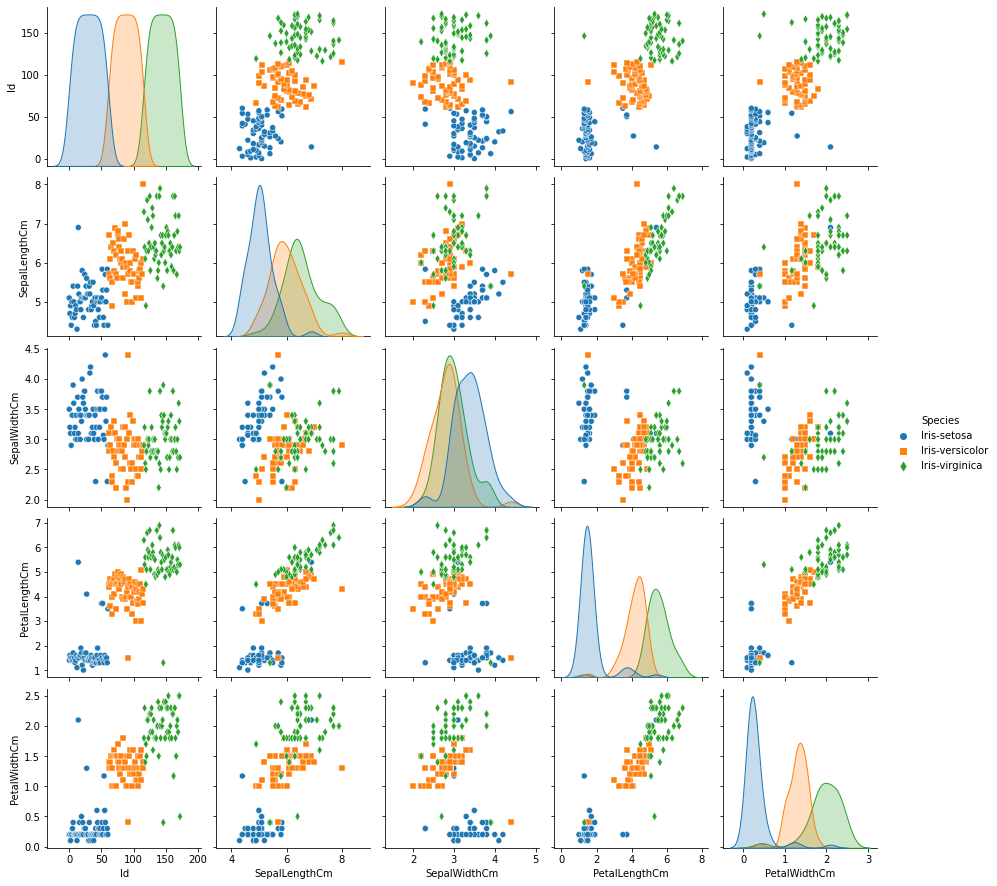

In [ ]:
sns.pairplot(data = data_iris, hue="Species", markers=["o","s","d"]);

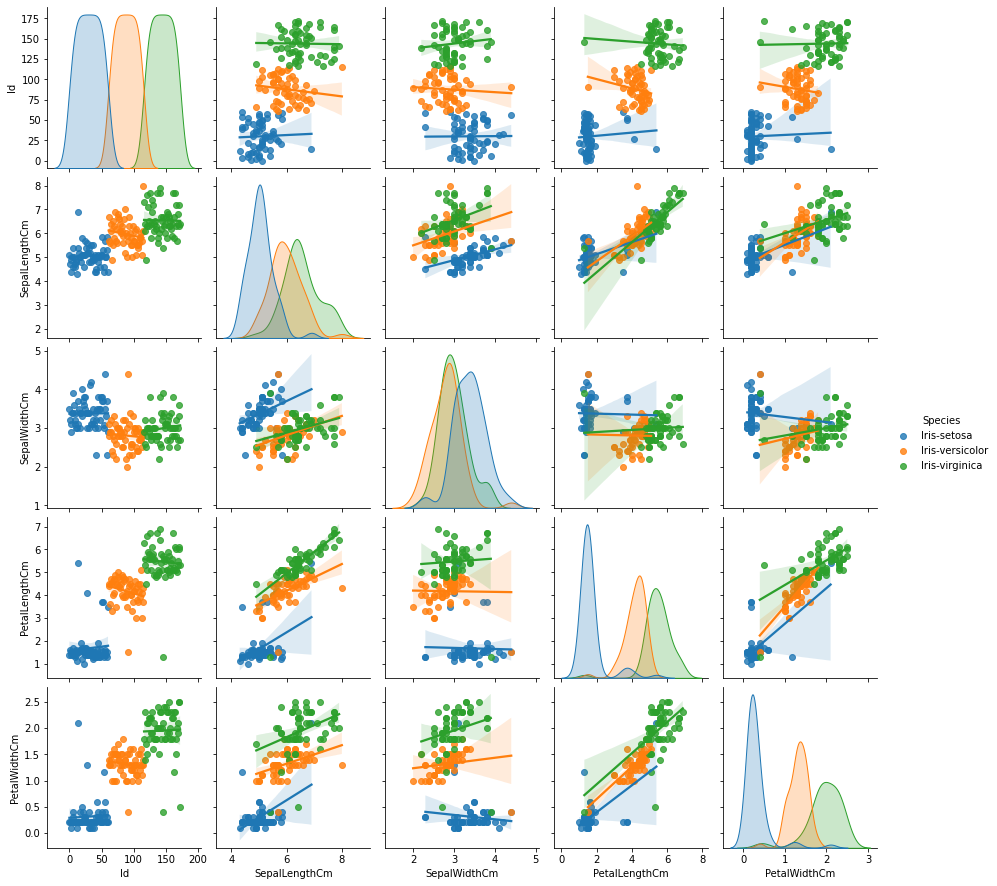

In [ ]:
sns.pairplot(data = data_iris, kind="reg", hue="Species");

## Outlier Detection

## 2. 3 Sigma Methodology 를 활용해 outlier를 파악해보자.

In [ ]:
data_iris.shape

(173, 6)

In [ ]:
for column in data_iris.columns[1:-1]:
    for sp in data_iris["Species"].unique():
        sp_type=data_iris[data_iris["Species"]==sp]
        Selected_column=sp_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg+std*3
        lower_lmt= avg-std*3
        outliers=Selected_column[(Selected_column <lower_lmt)|( Selected_column>upper_lmt)].index # picking outliers' indices
        data_iris.drop(index=outliers, inplace=True) # dropping outliers
        print(column,sp,outliers)               

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([115], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([91], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52, 60], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([146], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([172], dtype='int64')


## 3. 1.5 IQR(Inter quantile range)를 활용해 outlier를 파악해보자.

In [ ]:
for column in data_iris.columns[1:-1]:
    for sp in data_iris["Species"].unique():
        sp_type = data_iris[data_iris["Species"] == sp]
        Selected_column = sp_type[column]
        q1 = Selected_column.quantile(.25) # for select first quartile
        q3 = Selected_column.quantile(.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5*iqr #1.5 * iqr
        lower_limit = q1 - 1.5*iqr #1.5 * iqr  
        outlierss = Selected_column[(Selected_column <lower_lmt)|( Selected_column>upper_lmt)].index # picking outliers' indices
        print(outlierss)
        data_iris.drop(index = outlierss, inplace=True) # dropping outliers
        

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 55,
            56, 57, 58, 59],
           dtype='int64')
Int64Index([ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
             74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
             87,  88,  89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100,
            101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
            114],
           dtype='int64')
Int64Index([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
            129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
            142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155,
            156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
            169, 170, 171],
           dtype=